In [3]:
import pandas as pd
import re

df = pd.read_csv("/home/miroslav/Source/PAWS/paws_mdp_wo.txt", sep=" ", index_col = None)
# df

df['node_from_d'] = df['node_to_d'] - df['node_from_d']
df = df.drop('node_to_d', axis=1)
df = df.rename(columns={'node_from_d': 'distance'})
l = df.columns.tolist()
l[1],l[2] = l[2], l[1]
df = df[l]
df

# dfo = pd.DataFrame(columns=['node_from, node_to, distance, animal_density, cell_x, cell_y'], data=[df['node_from'], df['node_to'], df['node_from_d']-df['node_to_d',])



,node_from,node_to,distance,animal_density,grid_cell_x,grid_cell_y
0,468,455,700.0,3545.563911,24,22
1,468,474,1550.0,8310.410684,24,22
2,468,469,1250.0,6695.978503,24,22
3,468,411,1550.0,8309.798534,24,22
4,468,401,1600.0,8575.276996,24,22
5,468,473,1450.0,8610.271881,24,22
6,468,456,750.0,3921.291004,24,22
7,468,457,800.0,3852.207537,24,22
8,468,458,1150.0,4817.681635,24,22
9,532,527,1200.0,1900.326573,25,23


In [38]:
df.to_csv("/home/miroslav/Source/PAWS/paws_mdp_out.txt", index = False, sep=" ")

with open(r'/home/miroslav/Source/PAWS/paws_mdp.txt', 'r') as infile:
    with open(r'/home/miroslav/Source/PAWS/paws_mdp_wo.txt', 'w') as outfile:
        data = infile.read()
        data = re.sub(r'[(),]', "", data)
        outfile.write(data)

In [4]:
adj = [[0] * 553] * 553

for index, row in df.iterrows():
    # print(int(row['node_from']), int(row['node_to']))
    adj[int(row['node_from'])][int(row['node_to'])] = row['distance']
    adj[int(row['node_to'])][int(row['node_from'])] = row['distance']

In [5]:
import scipy as sp
from scipy import sparse
import numpy as np

dist_matrix = sp.sparse.csgraph.shortest_path(np.array(adj), directed=False)
# dist_matrix

In [21]:
pd.DataFrame(dist_matrix).to_csv("/home/miroslav/Source/PAWS/dist.gop", index = False, sep=" ")

In [22]:
df.describe()

,node_from,node_to,distance,animal_density,grid_cell_x,grid_cell_y
count,892905.000000,892905.000000,892905.000000,892905.000000,892905.000000,892905.000000
mean,281.502535,281.514203,986.055067,4280.141260,21.128959,21.423755
std,132.288296,132.275022,487.908537,3161.827390,2.037542,1.189485
min,0.000000,0.000000,100.000000,0.000000,16.000000,18.000000
25%,187.000000,187.000000,600.000000,2070.020823,20.000000,21.000000
50%,276.000000,276.000000,1100.000000,3835.881269,21.000000,21.000000
75%,394.000000,394.000000,1350.000000,5995.715499,23.000000,22.000000
max,552.000000,552.000000,2600.000000,31218.189588,26.000000,26.000000


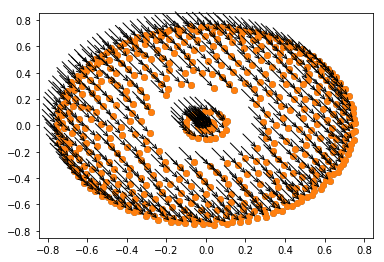

In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold


adist = np.array(dist_matrix)
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for x, y in zip(coords[:, 0], coords[:, 1]):
    plt.annotate(
        "",
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [8]:
coords

array([[ 0.09750944,  0.02187661],
       [ 0.09107352,  0.59030383],
       [ 0.53375917, -0.34107555],
       ..., 
       [-0.00077964,  0.01728243],
       [-0.44870332, -0.21166576],
       [-0.18700101,  0.47691189]])

In [ ]:
cdf = pd.DataFrame(coords)